## Mexico's COVID19 Data description and Analisys

> 
> 
> 
>
<div class="container" style="position: relative;text-align: center,border:2px solid red;
  color: white;">
  <img align="left" src="https://i.imgur.com/9hAvQVf.png">
</div>

<font size=5 color='black'>The name of each file changes every day</font>
>
<font size=5 color='black'> <a href="https://coronavirus.gob.mx/datos/#DownZCSV">https://coronavirus.gob.mx/datos/#DownZCSV</a> </font>
>
<img align="left" src="https://i.imgur.com/ohUy6u0.png">
<br>
<br>
<font size=5 color='black'>'200XXXCOVID19MEXICO.csv' comes from the link:</font>
<br>
<font size=5 color='black'> Todos los datos (DGE)</font>


# Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

In [2]:
# Pacient data contains detail information about every subject in the database, age, sex, and some illness history
patient_data = pd.read_csv('200519COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200519.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200519.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200519.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200519.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

# 1.- Frequency of cases

## Confirmed, Deaths, Negative and Suspicious Data

In [3]:
# Confirmed, negative, deaths and suspicious dataFrames have the same structure.
confirmed.head()

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,...,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020,16-05-2020,17-05-2020,18-05-2020,19-05-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,4,12,40,13,20,24,2,0,5,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,44,99,86,86,50,48,16,7,2,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,9,4,15,5,5,5,2,1,2,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,6,21,19,13,8,9,9,6,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,19,29,41,59,60,58,19,6,0,0


### State Names

In [4]:
state_names

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'DISTRITO FEDERAL', 'COAHUILA',
       'COLIMA', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'MEXICO', 'MICHOACAN', 'MORELOS', 'NAYARIT',
       'NUEVO LEON', 'OAXACA', 'PUEBLA', 'QUERETARO', 'QUINTANA ROO',
       'SAN LUIS POTOSI', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS',
       'TLAXCALA', 'VERACRUZ', 'YUCATAN', 'ZACATECAS', 'Nacional'],
      dtype=object)

### Functions to get discrete or cummulative data from any particular state

In [5]:
# Import the functions to get data from a particular country state
# data could be discrete (number of cases by day) or cummulative.

from data_helpers import get_discrete, get_cummulative

# Both functions take a name and a database. (name='string',raw_data=pd.DataFrame)
# works only for the confirmed, suspicious, negative and deaths dataframes
# patients data is different.

In [6]:
discrete_mexico_city_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_mexico_city_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

### get_discrete() gives an array for each day incidents

In [7]:
discrete_mexico_city_deaths

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 3, 1, 2, 4, 6, 5, 5, 7, 4, 4, 16, 10,
       5, 17, 20, 20, 9, 13, 19, 20, 21, 13, 21, 23, 20, 31, 22, 23, 29,
       32, 37, 31, 26, 40, 53, 43, 35, 48, 38, 49, 41, 30, 33, 34, 40, 29,
       31, 32, 32, 25, 32, 10, 9, 0], dtype=object)

### get_cummulative() gives an array of the cummulative record 

In [8]:
cummulative_mexico_city_deaths[:10]

[0, 0, 0, 0, 0, 1, 2, 2, 3, 6]


### Function to plot discrete data

In [9]:
# Data should be a list (even if there is only one state_data) with data from get_discrete()
# Names also should be an array of strings with equal len() to the data list
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string like: 'rbgy' if each of the colors are one letter.
# If colors = None, colors will be a cycle from the default: 'b', 'g', 'r', 'c', 'm' and 'y'

def plot_discrete(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    max_len = max([len(x) for x in data])
    
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(confirmed.columns[-1]) - datetime.timedelta(days=max_len), periods=max_len, freq='D')
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(data)/6))
       
    for ind, i in enumerate(data):
        if len(i) < max_len:
            i = [0]*(max_len-len(i))+list(i)
        
        plt.bar(index,i, label = names[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

### You can compare the same data for diferent states:

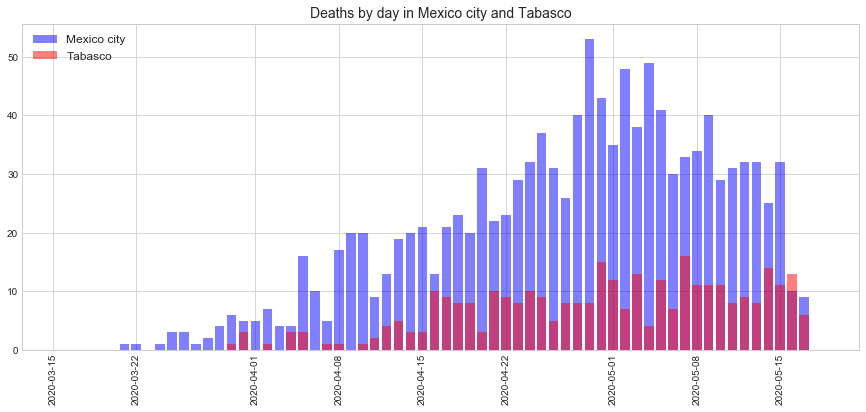

In [10]:
plot_discrete(data = [get_discrete('DISTRITO FEDERAL',deaths),
                      get_discrete('TABASCO',deaths),
                      ],
              names =['Mexico city','Tabasco'],
              colors=['b','r'],
              title='Deaths by day in Mexico city and Tabasco')

### Or different data for the same or different states

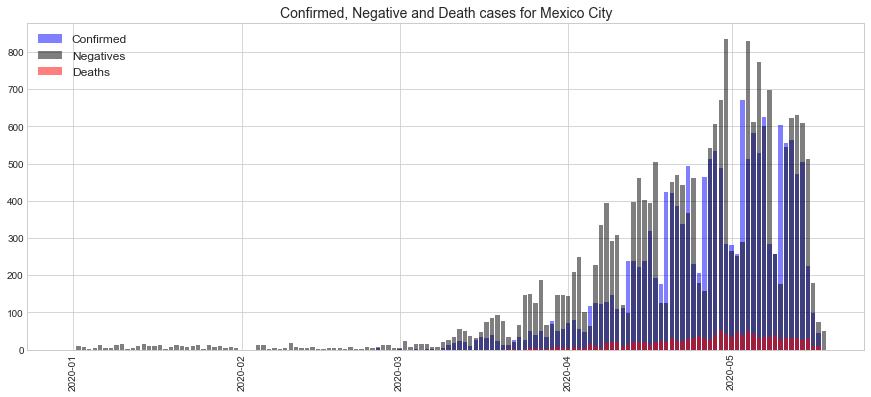

In [11]:
plot_discrete(data = [get_discrete('DISTRITO FEDERAL',confirmed),
                      get_discrete('DISTRITO FEDERAL',negatives),
                      get_discrete('DISTRITO FEDERAL',deaths)],
              names =['Confirmed','Negatives','Deaths'],
              colors=['b','black','r'],
              title='Confirmed, Negative and Death cases for Mexico City')

### Function to plot cummulative data

In [12]:
# Same Instructions of the discrete data apply here
# Obviosly input data should come from get_cummulative()

def plot_cummulative(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    max_len = max([len(x) for x in data])
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(deaths.columns[-1]) - datetime.timedelta(days=max_len), periods=max_len, freq='D', closed = None)
    
    if not colors:
        colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind,i in enumerate(data):
        if len(i) != max_len:
            i = [0]*(max_len-len(i))+i
        
        plt.plot(index,i,label=names[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
               
    plt.xticks(rotation=90)
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.show()

### Same as with discrete, you can compare the same data for diferent states:

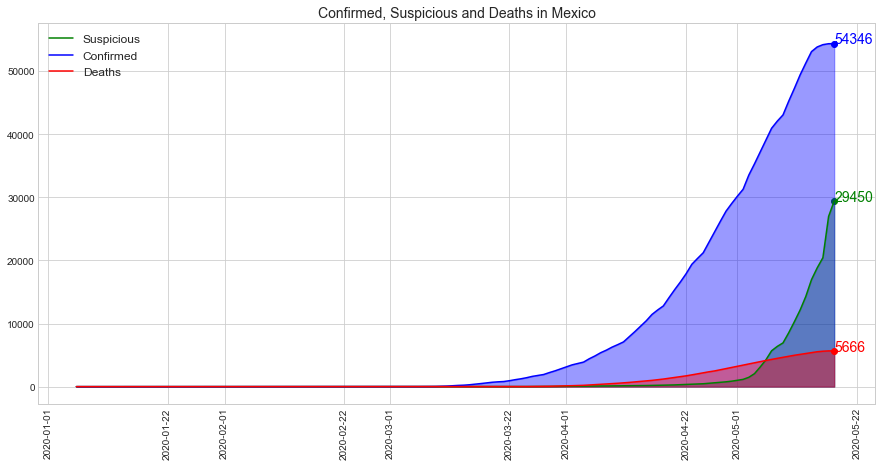

In [13]:
plot_cummulative([get_cummulative('National',suspicious),
                  get_cummulative('National',confirmed),
                  get_cummulative('National',deaths)],
                  names =['Suspicious','Confirmed','Deaths'],
                  colors=['g','b','r'],
                  title='Confirmed, Suspicious and Deaths in Mexico')

### Or different data from different states

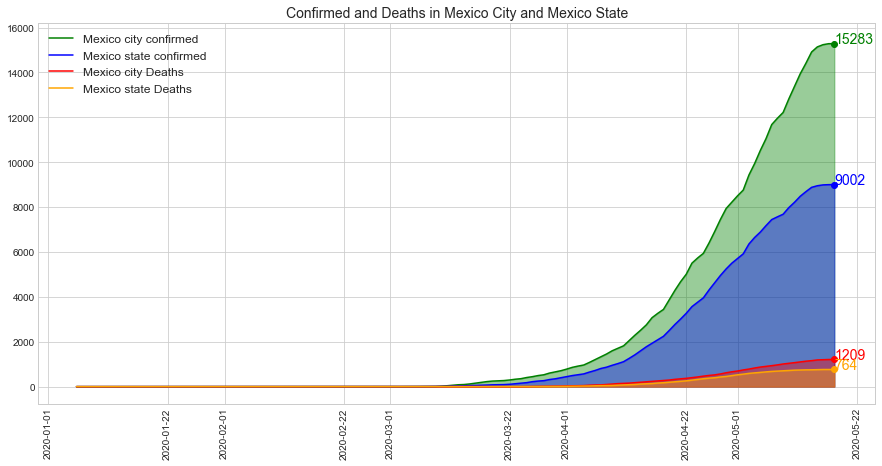

In [14]:
plot_cummulative([get_cummulative('DISTRITO FEDERAL',confirmed),
                  get_cummulative('MEXICO',confirmed),
                  get_cummulative('DISTRITO FEDERAL',deaths),
                  get_cummulative('MEXICO',deaths)],
                  names =['Mexico city confirmed','Mexico state confirmed',
                          'Mexico city Deaths','Mexico state Deaths'],
                  colors=['g','b','r','orange'],
                  title='Confirmed and Deaths in Mexico City and Mexico State')

## Ploting all data from max to min.

### Function to get several states sorted from max to min.

In [15]:
from data_helpers import get_max_to_min, get_max_to_min_names, get_min_to_max_names

# get_max_to_min returns two lists, one with a states data and one with the names of each state:
# [data1,data2..],['name1','name2'..] = get_max_to_min([raw_data1,raw_data2..],n=None,discrete=True,include_national=False)

# n is the number of states returned, if None will return all states
# Default data type is set to: discrete
# To switch for cummulative just set discrete parameter to == False
# National data is naturally much more higher that any particular state, by default is ommited
# To include it set the parameter include_national to == True

### Function to plot the data from get_max_to_min()

In [16]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted
# If the Discrete parameter is False then cummulative data will be plotted

def plot_all(raw_data,n=None, discrete=True, title='No title',colors = None):
    
    if discrete:
        data, names = get_max_to_min(raw_data,n=n,discrete=True)
        plot_discrete(data = data,
                      names = names,
                      colors = colors,
                      title = title)
    else:
        data, names = get_max_to_min(raw_data,n=n,discrete=False)
        plot_cummulative(data = data,
                         names = names,
                         colors = colors,
                         title = title)

### Discrete states from max to min incidence

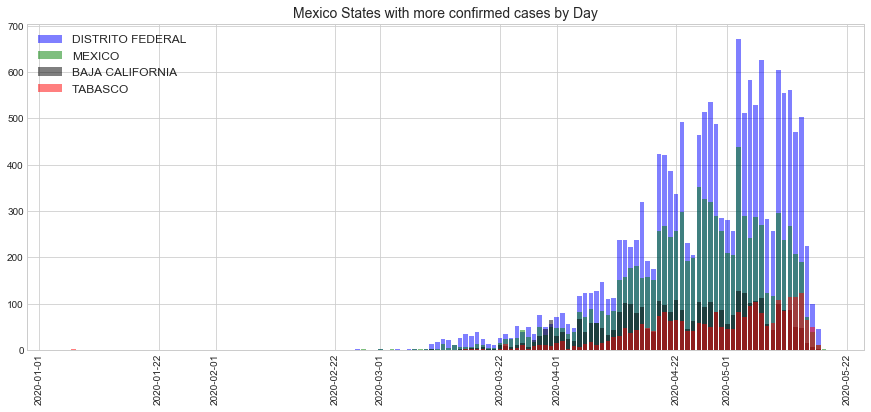

In [17]:
plot_all(raw_data = confirmed,
         n=4,
         colors= ['b','g','black','r'],
         discrete=True,
         title='Mexico States with more confirmed cases by Day')

### Cummulative states from max to min incidence

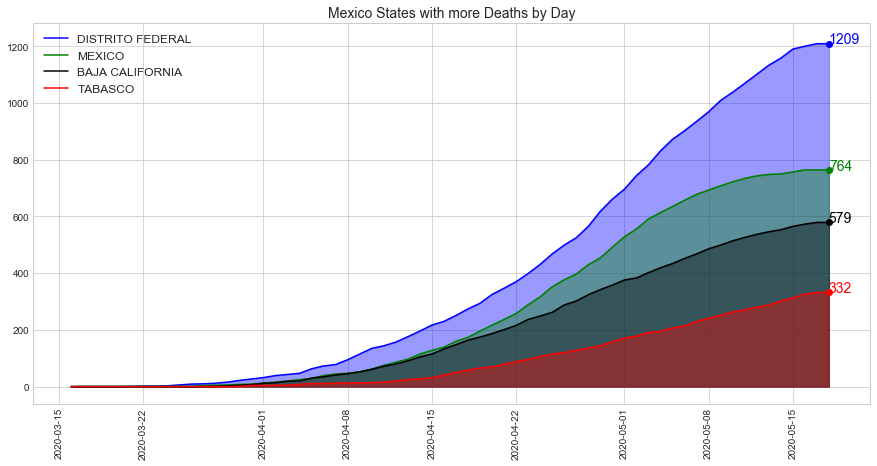

In [18]:
plot_all(raw_data = deaths,
         n=4,
         discrete=False,
         colors= ['b','g','black','r'],
         title='Mexico States with more Deaths by Day')

# 2.- Patients Data

### Cleaning the database

In [19]:
# Eliminate data from counties column, since it lacks one term an it's useless without it
patient_data = patient_data.drop('MUNICIPIO_RES',axis=1)

### Renaming columns to english

In [20]:
patient_data = patient_data.rename(columns={"FECHA_ACTUALIZACION":"Updated_at",
                                             "ID_REGISTRO": "id",
                                             "ORIGEN":"origin",
                                             "SECTOR":"sector",
                                             "ENTIDAD_UM": "treated_at",
                                             "SEXO": "sex",
                                             "ENTIDAD_NAC":"borne_at",
                                             "ENTIDAD_RES": "lives_at",
                                             "TIPO_PACIENTE": "pacient_type",
                                             "FECHA_INGRESO":"admission_date",
                                             "FECHA_SINTOMAS":"onset_symptoms",
                                             "FECHA_DEF": "day_of_death",
                                             "INTUBADO": "intubated",
                                             "NEUMONIA":"pneumonia",
                                             "EDAD":"age",
                                             "NACIONALIDAD":"is_mexican",
                                             "EMBARAZO":"pregnancy",
                                             "HABLA_LENGUA_INDIG":"speaks_dialect",
                                             "DIABETES":"diabetes",
                                             "EPOC": "copd",
                                             "ASMA":"asthma",
                                             "INMUSUPR":"immunosuppression",
                                             "HIPERTENSION":"hypertension",
                                             "OTRA_COM":"another_illness",
                                             "CARDIOVASCULAR":"cardiovascular",
                                             "OBESIDAD":"obesity",
                                             "RENAL_CRONICA":"kidney_disease",
                                             "TABAQUISMO":"smoker",
                                             "OTRO_CASO":"close_to_infected",
                                             "RESULTADO":"result",
                                             "MIGRANTE":"migrant",
                                             "PAIS_NACIONALIDAD":"nationality",
                                             "PAIS_ORIGEN": "country_of_origin",
                                             "UCI":"icu"})

### Data keys:

In [21]:
patient_data.keys()

Index(['Updated_at', 'id', 'origin', 'sector', 'treated_at', 'sex', 'borne_at',
       'lives_at', 'pacient_type', 'admission_date', 'onset_symptoms',
       'day_of_death', 'intubated', 'pneumonia', 'age', 'is_mexican',
       'pregnancy', 'speaks_dialect', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'another_illness',
       'cardiovascular', 'obesity', 'kidney_disease', 'smoker',
       'close_to_infected', 'result', 'migrant', 'nationality',
       'country_of_origin', 'icu'],
      dtype='object')

### Data sample

In [22]:
patient_data.head()

,Updated_at,id,origin,sector,treated_at,sex,borne_at,lives_at,pacient_type,admission_date,...,cardiovascular,obesity,kidney_disease,smoker,close_to_infected,result,migrant,nationality,country_of_origin,icu
0,2020-05-19,1e655a,2,3,27,2,27,27,1,2020-04-30,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-19,15de5a,2,4,15,1,15,15,1,2020-04-03,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-05-19,07bb86,2,4,9,2,30,9,2,2020-04-06,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-05-19,01ba89,2,4,2,1,18,2,2,2020-04-13,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-19,0f0bc2,2,4,17,2,17,17,2,2020-04-26,...,2,1,2,1,99,1,99,MÃ©xico,99,2


### Loading a function to translate the codes from the data

In [23]:
from data_helpers import patient_data_keys
# Some data is coded, for example from column:  patient_data['sector'],
# This function takes the column name and a key to decoded
# if the key == None, then outputs all the codes from the column

In [24]:
patient_data_keys('result',key=1)

'Positive for SARS-CoV-2'

In [25]:
patient_data_keys('sector',key=None)

KEYS for  SECTOR :
Key:  1  :  red cross
Key:  2  :  Integral Family Development System (DIF)
Key:  3  :  state
Key:  4  :  Mexican Institute for Social Security (IMSS)
Key:  5  :  IMSS-BIENESTAR
Key:  6  :  Institute for Social Security and Services for State Workers (ISSSTE)
Key:  7  :  county
Key:  8  :  Mexican Oil (PEMEX)
Key:  9  :  Private
Key:  10  :  National Secretary of Defense (SEDENA)
Key:  11  :  Secretary of Sea (SEMAR)
Key:  12  :  Secretary of Health (SSA)
Key:  13  :  University
Key:  99  :  no specified


# Exploring the database

### General subsets

In [26]:
men = patient_data[patient_data['sex']==2]
women = patient_data[patient_data['sex']==1]
alive = patient_data[patient_data['day_of_death']=='9999-99-99']
deceased = patient_data[patient_data['day_of_death']!='9999-99-99']
deceased = deceased[deceased['result']==1]
men_deceased = deceased[deceased['sex']==2]
women_deceased =  deceased[deceased['sex']==1]

### Active Infections subsets

In [38]:
# Import a helper function that outputs the active infected patients
from data_helpers import get_active_database
# Create a subset of active infected with a window of 14 days
# get_active_database(data,state,window)

# Import a helper function that gives you a cummulative record of active infected by state
# get_active_database(data,state,window)
from data_helpers import get_cummulative_actives
from data_helpers import patients_codes

### Plotting Active infections

In [28]:
def plt_actives(data,names,trimx=0):
    plt.rcParams["figure.figsize"] = (15,7)
    
    first_day = min([min(x.index) for x in data])
    last_day = max([max(x.index) for x in data])
    
    new_index = pd.date_range(start=first_day, end=last_day)
    
    for ind, dataframe in enumerate(data):
        if len(dataframe) != len(new_index):
            plt.plot([str(x)[5:11] for x in new_index],[0]*(len(new_index)-len(dataframe))+list(dataframe['cummulative']),label=names[ind])
        else:
            plt.plot([str(x)[5:11] for x in new_index],dataframe['cummulative'],label=names[ind])
    
    plt.xticks(rotation=90, fontsize=12)
    plt.xlim(trimx,)
    plt.legend(fontsize=14)
    plt.show();
    

In [39]:
max_min_states = get_max_to_min_names(patient_data,n=4,include_national=False)
max_min_states = [patients_codes['states'][x] for x in max_min_states]

plot_max_min = [get_cummulative_actives(patient_data,x,14) for x in max_min_states]

min_max_states = get_min_to_max_names(patient_data,n=,include_national=False)
min_max_states = [patients_codes['states'][x] for x in min_max_states]

plot_min_max = [get_cummulative_actives(patient_data,x,14) for x in min_max_states]

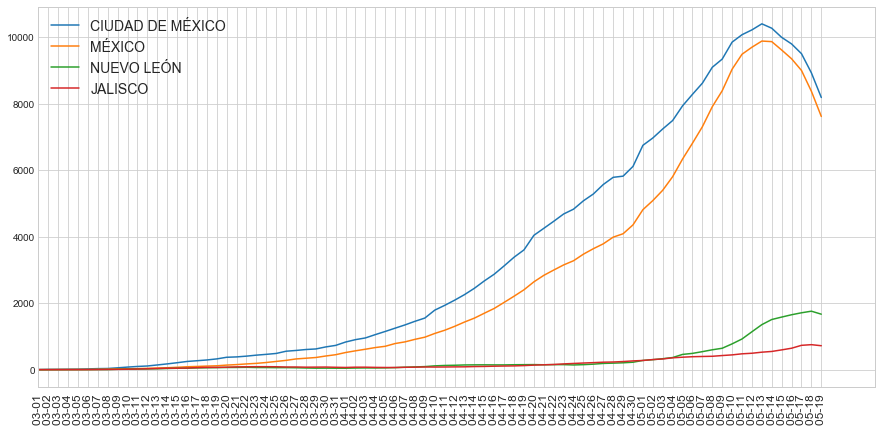

In [40]:
plt_actives(plot_max_min,max_min_states,trimx=30)

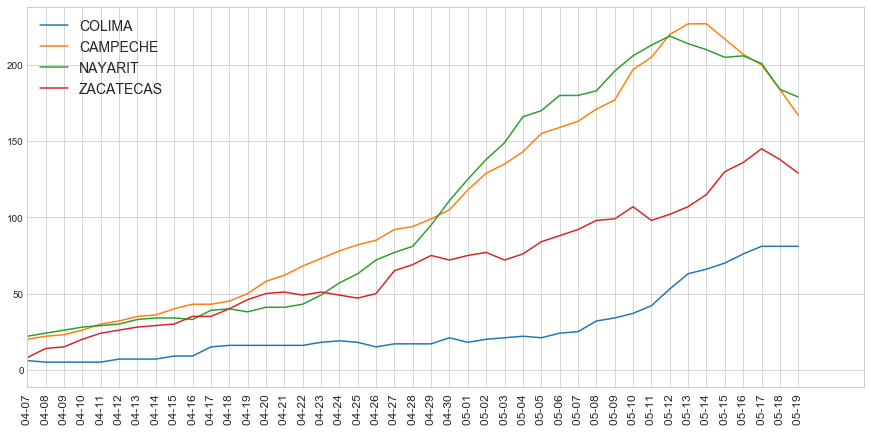

In [41]:
plt_actives(plot_min_max,min_max_states,trimx=30)

### General Age Histogram

In [ ]:
patient_data_keys('result')

In [ ]:
deaths.nombre

### Plotting Age for general population

In [ ]:
patient_data['age'].hist(bins=60)
plt.axvline(x=patient_data['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(patient_data["age"].mean())}')
plt.title('Age frequency for general population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Men and Women Proportion

In [ ]:
plt.close('all')
labels = 'Men', 'Women'
sizes = [len(men),len(women)]
colors = ['b', 'r']

plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 20,'color':'white','weight':'bold'},
       shadow=True)

plt.title(f'Men and Women proportion',fontsize=20)
plt.legend(fontsize=20)
plt.axis('equal')
plt.show();

### Plotting Man and Women Age frequency

In [ ]:
men.age.hist(bins=60,alpha=0.4,label='Men',color='b')
plt.axvline(x=men.age.mean(),linewidth=4, color='b',label=f'Mean Age fo Men: {int(men["age"].mean())}')
women.age.hist(bins=60,alpha=0.4,label='Women',color='r')
plt.axvline(x=women.age.mean(),linewidth=4, color='r',label=f'Mean Age fo Women: {int(women["age"].mean())}')

plt.title('Age frequency for men and women',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Deceased Age frequency

In [ ]:
plt.close('all')
deceased['age'].hist(bins=60)
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(deceased["age"].mean())}')

plt.title('Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Alive vs Deceased Age frequency

In [ ]:
plt.close('all')

alive['age'].hist(bins=80,alpha=0.5)
plt.axvline(x=alive['age'].mean(),linewidth=4, color='b',label=f'Mean Alive Age: {int(alive["age"].mean())}')

deceased['age'].hist(bins=50,color='r')
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Deceased Age: {int(deceased["age"].mean())}')

plt.title('Alive vs Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,1500)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Woman vs Men Decease Age

In [ ]:
plt.close('all')

men_deceased['age'].hist(bins=110,alpha=0.5)
plt.axvline(x=men_deceased['age'].mean(),linewidth=4, color='b',label=f'Mean for men Deceased Age: {int(men_deceased["age"].mean())}')

women_deceased['age'].hist(bins=110,color='r',alpha=0.5)
plt.axvline(x=women_deceased['age'].mean(),linewidth=4, color='r',label=f'Mean for Woman Deceased Age: {int(women_deceased["age"].mean())}')

plt.title('Men vs Woman Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,200)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Probaility Density for women and men deceases

In [ ]:
plt.close('all')
sns.kdeplot(men_deceased['age'], label='MEN',shade = True)
sns.kdeplot(women_deceased['age'],label = 'WOMEN',shade= True)
plt.show()

### Checking if there are significative differences between the two samples

In [ ]:
# T test for independen samples, to see if the two distributions are the same
from scipy.stats import ttest_ind
# Implements Cohens Difference to see how far away are the two samples
from data_helpers import cohens_d

_, pv = ttest_ind(men_deceased['age'], women_deceased['age'])

if pv < 0.01:
    print(f'The two samples are distinct, alpha = {pv}')
else:
    print('There is not difference between samples')

difference_between_samples = round(cohens_d(men_deceased['age'], women_deceased['age']),2)

print(f'Men are {difference_between_samples} stds away from Women')


## Proportion of deaths by age filtered by sex

### Getting the Histogram data

In [ ]:
# This function takes an array of ages and outputs a dictionary for plotting an histogram:
# get_age_bins(data,bin_size)
from data_helpers import get_age_bins

ages_freq_dead_men = get_age_bins(men_deceased, bin_size = 5)
ages_freq_dead_women = get_age_bins(women_deceased, bin_size = 5)
age_freq_men = get_age_bins(men, bin_size = 5)
age_freq_women = get_age_bins(women, bin_size = 5)

### Calculating the proportions

In [ ]:
# This function takes the histogram for general population and the filtered one,
# returns an histogram with proportion of the filtered data in relation to the general population
# get_proportions(filtered_histogram, general_patients_histogram)
from data_helpers import get_proportions

death_proportions_men = get_proportions(ages_freq_dead_men, age_freq_men)
death_proportions_women = get_proportions(ages_freq_dead_women, age_freq_women)

## Plotting proportion of deaths by age (men and women)

In [ ]:
plt.close('all')
fig, axs = plt.subplots(2,figsize=(16,10))
plt.subplots_adjust(hspace=0.5)

axs[0].bar(list(death_proportions_men.keys()),list(death_proportions_men.values()))
axs[0].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[0].set_title('Men Proportions of death by age',fontsize=20)
for i in range(23):
    value = round(list(death_proportions_men.values())[i],2)
    if value == 0:
        continue
    else:
        axs[0].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

axs[1].bar(list(death_proportions_women.keys()),list(death_proportions_women.values()),color='r',alpha=0.5)
axs[1].set_ylim(0,25)
axs[1].set_title('Women Proportions of death by age',fontsize=20)
axs[1].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[1].set_xlim(0,23)
for i in range(23):
    value = round(list(death_proportions_women.values())[i],2)
    if value == 0:
        continue
    else:
        axs[1].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize=14)
plt.show()

## Exploring the frequency of Ilness in deceased vs alive patients

### Generating subsets of data

In [ ]:
deceased_illness = deceased[['pneumonia','diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
alive_illness = alive[['pneumonia','diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
man_deceased_illness   = deceased_illness[deceased_illness['sex']==1]
woman_deceased_illness = deceased_illness[deceased_illness['sex']==2]
alive_man_illness      = alive_illness[alive_illness['sex']==1]
alive_woman_illness    = alive_illness[alive_illness['sex']==2]

man_deceased_illness   = man_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
woman_deceased_illness = woman_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_man_illness      = alive_man_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_woman_illness    = alive_woman_illness.drop('sex',axis = 1).replace([97,98,99],2)

### Man Proportions of Ilness, deceased vs Alive

In [ ]:
from data_helpers import get_illness_proportions

In [ ]:
mdp = get_illness_proportions(man_deceased_illness)
wdp = get_illness_proportions(woman_deceased_illness)
malp = get_illness_proportions(alive_man_illness)
walp = get_illness_proportions(alive_woman_illness)

In [ ]:
plt.close('all')
plt.bar(list(mdp.keys()),list(mdp.values()), label = 'Deceased Men', color ='r')
plt.bar(list(mdp.keys()),list(malp.values()), label = 'Alive Men', color ='b')


for ind, i in enumerate(mdp.keys()):
    plt.text(ind-0.2, mdp[i] + 1, str(round(mdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [ ]:
from datetime import datetime, timedelta

In [ ]:
patient_data.keys()

In [ ]:
active_nation = get_active(patient_data,'ESTADOS UNIDOS MEXICANOS')

In [ ]:
active_nation

In [ ]:
oaxaca = patient_data[patient_data['lives_at']==20]
oaxaca_infected = oaxaca[oaxaca['result']!=2]
dates = oaxaca_infected['onset_symptoms']
dates = pd.to_datetime(dates)
oaxaca_infected = oaxaca_infected.drop('onset_symptoms',axis = 1)
oaxaca_infected['onset_symptoms'] = dates


In [ ]:
infection_window = pd.to_datetime(datetime.today() - timedelta(days=14))
oaxaca_active = oaxaca_infected[oaxaca_infected['onset_symptoms']>infection_window]

In [ ]:
list(oaxaca_active['result'].values).count(1)

In [ ]:
list(oaxaca_active['close_to_infected'].values).count(2)

In [ ]:
patient_data_keys('result')

In [ ]:
oaxaca_active['close_to_infected'].hist()

In [ ]:
len(oaxaca_infected)

In [ ]:
init = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')

In [ ]:
e = init + timedelta(days=2)

In [ ]:
e > init

In [ ]:
s =pd.to_datetime(init)

In [ ]:

oaxaca_infected = oaxaca_infected[oaxaca['admission_date']>= init]

In [ ]:
len(oaxaca_infected)

In [ ]:
window = datetime.today() - timedelta(days=14)

In [ ]:
h = oaxaca['admission_date'].iloc[0]

In [ ]:
h

In [ ]:
e = dateTime.Today.AddDays(-14)
e

In [ ]:
len(oaxaca_infected)

In [ ]:
patient_data.keys()

In [ ]:
plt.close('all')
fig, axs = plt.subplots(2,figsize=(16,10))
plt.subplots_adjust(hspace=0.5)

axs[0].bar(list(death_proportions_men.keys()),list(death_proportions_men.values()))
axs[0].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[0].set_title('Men Proportions of death by age',fontsize=20)
for i in range(23):
    value = round(list(death_proportions_men.values())[i],2)
    if value == 0:
        continue
    else:
        axs[0].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

axs[1].bar(list(death_proportions_women.keys()),list(death_proportions_women.values()),color='r',alpha=0.5)
axs[1].set_ylim(0,25)
axs[1].set_title('Women Proportions of death by age',fontsize=20)
axs[1].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[1].set_xlim(0,23)
for i in range(23):
    value = round(list(death_proportions_women.values())[i],2)
    if value == 0:
        continue
    else:
        axs[1].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
man_deceased_illness.hist();

In [ ]:
woman_deceased_illness.hist();

In [ ]:
edad = X['EDAD'] 
y = [1 if x == '9999-99-99' else 0 for x in X['FECHA_DEF']]
sexo = [0 if x == 1 else 99 for x in X['SEXO']]
X = X[['DIABETES','EPOC',
             'ASMA', 'INMUSUPR', 'HIPERTENSION',
             'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']]
X['SEXO'] = sexo
X = X.replace(97,2)
X = X.replace(98,2)
X = X.replace(99,2)
X = X.replace(1,100)
X = X.replace(2,-100)
X['EDAD'] = edad


In [ ]:
plot_discrete(data = [get_discrete('Nacional',deaths)],
              names =['Mexico'],
              colors=['b'],
              title='Deaths by day Mexico')